# Weather prediction using Linear Regession

# Importing required libraries

Import the required libraries. Pandas will be used for reading data file and various other operations on the dataframe. Numpy will be used for mathematical operations on the data. sklearn.metrics amath and random libraries will be used for various other operations.Matplotlib will be used for plotting the data.

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
#from sklearn.model_selection import train_test_split

Import the data and see its characterstics.

In [2]:
dataset=pd.read_csv('weather.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77285 entries, 0 to 77284
Data columns (total 11 columns):
Formatted Date              77285 non-null object
Summary                     77285 non-null object
Precip Type                 76881 non-null object
Temperature (C)             77285 non-null float64
Apparent Temperature (C)    77285 non-null float64
Humidity                    77285 non-null float64
Wind Speed (km/h)           77285 non-null float64
Wind Bearing (degrees)      77285 non-null int64
Visibility (km)             77285 non-null float64
Pressure (millibars)        77285 non-null float64
Daily Summary               77285 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 6.5+ MB


See the characteristics of the numerical attributes of the data.

In [3]:
dataset.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,77285.000000,77285.000000,77285.000000,77285.000000,77285.000000,77285.000000,77285.000000
mean,11.932073,10.851287,0.734422,10.802289,187.739678,10.350661,1003.218889
std,9.568044,10.720713,0.195435,6.896763,107.337926,4.189296,117.080764
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.561111,2.272222,0.600000,5.828200,117.000000,8.339800,1011.910000
50%,11.994444,11.994444,0.780000,9.965900,180.000000,10.046400,1016.470000
75%,18.850000,18.850000,0.890000,14.135800,290.000000,14.812000,1021.080000
max,39.905556,38.416667,1.000000,63.852600,359.000000,16.100000,1046.380000


See the actual data.

In [4]:
dataset

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
77280,2016-09-09 18:00:00.000 +0200,Partly Cloudy,rain,28.838889,27.850000,0.32,12.2038,21,16.1000,1014.07,Partly cloudy starting in the morning.
77281,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,1014.36,Partly cloudy starting in the morning.
77282,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,1015.16,Partly cloudy starting in the morning.
77283,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,1015.66,Partly cloudy starting in the morning.


The column with highest number of variations in it.It has 214 unique values and is not required by the regressor.

In [5]:
print(len(dataset['Daily Summary'].unique()))

214


Drop unnecessary columns like date and Daily summary which has very high amount of categorical values.If one hot encoded it will unncessarily increase the number of dimensions.

In [6]:
dataset=dataset.drop(['Daily Summary','Formatted Date'],axis=1)
dataset

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
77280,Partly Cloudy,rain,28.838889,27.850000,0.32,12.2038,21,16.1000,1014.07
77281,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,1014.36
77282,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,1015.16
77283,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,1015.66


The following is a helper function which is used to normalize the training data.It basically takes the names of the columns which we want to normalize and based on the names it calculates means and standard deviations of each of them and applies the same to each column.It is equivalent to standardscaler of sklearn.

In [7]:
def normalize(column_names,dataset):
    train_mean=[]
    train_std=[]
    for column in column_names:
        print("Column_name: ",column,"Column_mean: ",dataset[column].mean(),"Column_std :",dataset[column].std())
        #dataset[column]=(dataset[column]-dataset[column].min())/(dataset[column].max()-dataset[column].min())
        train_mean.append(dataset[column].mean())
        train_std.append(dataset[column].std())
        dataset[column]=(dataset[column]-dataset[column].mean())/(dataset[column].std())
    return dataset,train_mean,train_std

The follwing function is my own implementation of train test split provided by sklearn.

In [8]:
#train test split
def train_test_split(df,test_size):
    df_size=len(df)
    if isinstance(test_size,float):#if test size is passed as a proportion
        test_size=round(test_size*df_size)
    #pick random samples from the data for train test split
    indexes=df.index.tolist()
    test_indices=random.sample(population=indexes,k=test_size)
    #now putting the values of train and test data into the respective df's
    test_df=df.loc[test_indices]
    cropped_df=df.drop(test_indices)
    train_df=cropped_df
    return train_df,test_df

Split the data into train and test.

In [9]:
train_data,test_data=train_test_split(dataset,0.25)

Normalize the numerical columns 

In [10]:
normalize_list=['Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)']
train_data,train_mean,train_std=normalize(normalize_list,train_data)
train_data

Column_name:  Temperature (C) Column_mean:  11.955388018616917 Column_std : 9.581671630787548
Column_name:  Humidity Column_mean:  0.7337233455248087 Column_std : 0.19527472776803792
Column_name:  Wind Speed (km/h) Column_mean:  10.82226256642054 Column_std : 6.907315662564161
Column_name:  Wind Bearing (degrees) Column_mean:  187.550048305845 Column_std : 107.50553450773232
Column_name:  Visibility (km) Column_mean:  10.351661988475607 Column_std : 4.181305916452288
Column_name:  Pressure (millibars) Column_mean:  1003.1258494927887 Column_std : 117.33536265804337


,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,-0.259158,7.388889,0.800291,0.477383,0.590202,1.309313,0.102306
2,Mostly Cloudy,rain,-0.269015,9.377778,0.800291,-0.998052,0.153015,1.101387,0.109210
3,Partly Cloudy,rain,-0.382658,5.944444,0.493032,0.475052,0.757635,1.309313,0.113215
4,Mostly Cloudy,rain,-0.333953,6.977778,0.493032,0.032189,0.664616,1.309313,0.114067
5,Partly Cloudy,rain,-0.285249,7.111111,0.595452,0.454075,0.655315,1.101387,0.115346
...,...,...,...,...,...,...,...,...,...
77278,Partly Cloudy,rain,1.996306,29.611111,-2.323513,0.444751,-1.372488,1.374771,0.092420
77279,Partly Cloudy,rain,1.963256,29.311111,-2.323513,0.491369,-1.521317,1.243855,0.091227
77280,Partly Cloudy,rain,1.762062,27.850000,-2.118673,0.200011,-1.549223,1.374771,0.093272
77283,Partly Cloudy,rain,1.052374,22.038889,-0.889636,-0.266162,-1.465506,1.374771,0.106823


See the train mean and train standard deviation.

In [11]:
print(train_mean)
print('------')
print(train_std)

[11.955388018616917, 0.7337233455248087, 10.82226256642054, 187.550048305845, 10.351661988475607, 1003.1258494927887]
------
[9.581671630787548, 0.19527472776803792, 6.907315662564161, 107.50553450773232, 4.181305916452288, 117.33536265804337]


In [12]:
(train_data.describe())

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,5.796400e+04,57964.000000,5.796400e+04,5.796400e+04,5.796400e+04,5.796400e+04,5.796400e+04
mean,1.843655e-16,10.873933,-8.553873e-16,-3.255817e-16,1.057895e-16,-3.196976e-16,-5.209797e-16
std,1.000000e+00,10.737699,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.525231e+00,-26.227778,-3.757390e+00,-1.566783e+00,-1.744562e+00,-2.475701e+00,-8.549220e+00
25%,-7.682317e-01,2.300000,-6.847960e-01,-7.189316e-01,-6.655476e-01,-4.773059e-01,7.477840e-02
50%,8.134835e-03,12.033333,2.369823e-01,-1.169865e-01,-7.022939e-02,-7.300638e-02,1.133857e-01
75%,7.213020e-01,18.866667,8.002912e-01,4.797142e-01,9.529737e-01,1.066733e+00,1.524191e-01
max,2.917045e+00,38.416667,1.363600e+00,7.677416e+00,1.594801e+00,1.374771e+00,3.686370e-01


This function normailizes test data using the above calculated train mean and train std ,normalize the test data with the respective train mean and std for the columns.

In [13]:
def normalize_test(test_values,train_mean,train_std):
    normalize_list=['Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)']
    i=0
    for column in  normalize_list:
        test_values[column]=(test_values[column]-train_mean[i])/train_std[i]
    return (test_values)

Extract the labels from both train and test data.

In [14]:
train_labels=train_data['Apparent Temperature (C)']
test_labels=test_data['Apparent Temperature (C)']

Drop the labels as they are no longer needed

In [15]:
train_data=train_data.drop(['Apparent Temperature (C)'],axis=1)
test_data=test_data.drop(['Apparent Temperature (C)'],axis=1)

One hot encode Summary and Precip Type columns as they are categorical.

In [16]:
dummies1 = pd.get_dummies(train_data["Summary"])
dummies2 = pd.get_dummies(train_data["Precip Type"],dummy_na=True)

Visulaize the one hot encoded columns.

In [17]:
dummies1.head()

,Breezy,Breezy and Dry,Breezy and Foggy,Breezy and Mostly Cloudy,Breezy and Overcast,Breezy and Partly Cloudy,Clear,Dangerously Windy and Partly Cloudy,Drizzle,Dry,...,Light Rain,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Windy,Windy and Foggy,Windy and Mostly Cloudy,Windy and Overcast,Windy and Partly Cloudy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [18]:
dummies2.head()

,rain,snow,NaN
0,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0


Merge the one hot encoded columns withe the original data frame and drop the respective original column.

In [19]:
dummy=pd.concat([dummies1,dummies2],axis=1)

In [20]:
train_df=pd.concat([train_data,dummy],axis=1)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57964 entries, 0 to 77284
Data columns (total 37 columns):
Summary                                57964 non-null object
Precip Type                            57661 non-null object
Temperature (C)                        57964 non-null float64
Humidity                               57964 non-null float64
Wind Speed (km/h)                      57964 non-null float64
Wind Bearing (degrees)                 57964 non-null float64
Visibility (km)                        57964 non-null float64
Pressure (millibars)                   57964 non-null float64
Breezy                                 57964 non-null uint8
Breezy and Dry                         57964 non-null uint8
Breezy and Foggy                       57964 non-null uint8
Breezy and Mostly Cloudy               57964 non-null uint8
Breezy and Overcast                    57964 non-null uint8
Breezy and Partly Cloudy               57964 non-null uint8
Clear                                

In [21]:
train_df=train_df.drop(['Summary','Precip Type'],axis=1)

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57964 entries, 0 to 77284
Data columns (total 35 columns):
Temperature (C)                        57964 non-null float64
Humidity                               57964 non-null float64
Wind Speed (km/h)                      57964 non-null float64
Wind Bearing (degrees)                 57964 non-null float64
Visibility (km)                        57964 non-null float64
Pressure (millibars)                   57964 non-null float64
Breezy                                 57964 non-null uint8
Breezy and Dry                         57964 non-null uint8
Breezy and Foggy                       57964 non-null uint8
Breezy and Mostly Cloudy               57964 non-null uint8
Breezy and Overcast                    57964 non-null uint8
Breezy and Partly Cloudy               57964 non-null uint8
Clear                                  57964 non-null uint8
Dangerously Windy and Partly Cloudy    57964 non-null uint8
Drizzle                                

Since test data can or cannot contain some values in Summary we need to maintain consistency between the columns of train data and columns of test data.We see below thatsummary value in test should contain 25 unique values,but it contains lesser.

In [23]:
test_data.Summary.unique().shape

(23,)

In [24]:
lst1=dummies1.columns
lst1=list(lst1)
lst2=dummies2.columns
lst2=list(lst2)

In [25]:
dummies3 = pd.get_dummies(test_data["Summary"])
dummies4 = pd.get_dummies(test_data["Precip Type"])

Normalize the test data using the train values.

In [26]:
test_data=normalize_test(test_data,train_mean,train_std)
test_data

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
40005,Partly Cloudy,rain,0.191355,-1.147544,-0.975528,30.688237,-0.368943,105.143930
9834,Partly Cloudy,rain,-1.226282,-1.152762,-0.862948,27.870357,0.403991,105.832745
54901,Partly Cloudy,rain,-0.947973,-1.168417,-0.261404,24.948111,0.432556,105.453897
22999,Overcast,snow,-1.363697,-1.143369,0.096498,21.712768,-0.878071,104.777606
28817,Partly Cloudy,rain,0.193094,-1.148587,-0.968807,12.319835,-0.533611,104.540695
...,...,...,...,...,...,...,...,...
1315,Foggy,snow,-1.417040,-1.143369,-0.911677,9.188857,-1.230932,106.216812
5514,Partly Cloudy,snow,-1.418779,-1.184072,0.459441,29.853310,0.313256,105.313003
23428,Foggy,snow,-2.046714,-1.151718,-0.842785,32.775556,-1.012494,107.214550
1840,Mostly Cloudy,snow,-1.766086,-1.159024,-0.812540,29.540212,-0.222757,105.491469


In [27]:
dummies3=dummies3.T.reindex(lst1).T.fillna(0)
dummies4=dummies4.T.reindex(lst2).T.fillna(0)
print(dummies3.shape,dummies4.shape)
dummy_test=pd.concat([dummies3,dummies4],axis=1)
test_df=pd.concat([test_data,dummy_test],axis=1)
test_df=test_df.drop(['Summary','Precip Type'],axis=1)
test_df.head()

(19321, 26) (19321, 3)


,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Breezy,Breezy and Dry,Breezy and Foggy,Breezy and Mostly Cloudy,...,Partly Cloudy,Rain,Windy,Windy and Foggy,Windy and Mostly Cloudy,Windy and Overcast,Windy and Partly Cloudy,rain,snow,NaN
40005,0.191355,-1.147544,-0.975528,30.688237,-0.368943,105.143930,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9834,-1.226282,-1.152762,-0.862948,27.870357,0.403991,105.832745,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
54901,-0.947973,-1.168417,-0.261404,24.948111,0.432556,105.453897,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
22999,-1.363697,-1.143369,0.096498,21.712768,-0.878071,104.777606,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28817,0.193094,-1.148587,-0.968807,12.319835,-0.533611,104.540695,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Double check if the columns are consistent.

In [28]:
train_values=np.array(train_df)
test_values=np.array(test_df)
train_labels=np.array(train_labels)
test_labels=np.array(test_labels)
print(train_values.shape,test_values.shape)

(57964, 35) (19321, 35)


The follwing function Predicts the value

In [29]:
def predict(values,weights,bias):
    return np.dot(values,weights)+bias

The gradient descent function works like the general gradient descent algorithm without regluarization terms.

In [ ]:
def gradient_descent_mape(weights,train_values,train_labels,alpha,bias,num_iter):
    num_samples=train_values.shape[0]
    dim=train_values.shape[1]
    cost=np.ones(num_iter)
    i=0
    #print(weights,bias)
    for i in range(num_iter):
            predict=np.dot(train_values,weights)+bias
            cost[i]=(1/(2*num_samples)*sum(np.abs(predict-train_labels)))
            #print(cost[i])
            dw=1/(num_samples)*np.dot(train_values.T,(predict-train_labels))
            db=1/(num_samples)*np.sum(predict-train_labels)
            weights-=alpha*dw
            bias-=alpha*db
            i+=1
    return weights,bias,cost

In [64]:
def gradient_descent_mae(weights,train_values,train_labels,alpha,bias,num_iter):
    num_samples=train_values.shape[0]
    dim=train_values.shape[1]
    cost=np.ones(num_iter)
    i=0
    #print(weights,bias)
    for i in range(num_iter):
            predict=np.dot(train_values,weights)+bias
            cost[i]=(1/(num_samples)*sum(np.abs(predict-train_labels)))
            #print(cost[i])
            if(np.sum(predict-train_labels)>0):
                dw=+1*np.mean(train_values,axis=0)
                db=+1
            elif(np.sum(predict-train_labels)<0):
                dw=-1*np.mean(train_values,axis=0)
                db=-1
            else:
                return weights,bias,cost
            weights-=alpha*dw
            bias-=alpha*db
            i+=1
    return weights,bias,cost

In [30]:
def gradient_descent(weights,train_values,train_labels,alpha,bias,num_iter):
    num_samples=train_values.shape[0]
    dim=train_values.shape[1]
    cost=np.ones(num_iter)
    i=0
    #print(weights,bias)
    for i in range(num_iter):
            predict=np.dot(train_values,weights)+bias
            cost[i]=(1/(2*num_samples)*sum(np.square(predict-train_labels)))
            #print(cost[i])
            dw=1/(num_samples)*np.dot(train_values.T,(predict-train_labels))
            db=1/(num_samples)*np.sum(predict-train_labels)
            weights-=alpha*dw
            bias-=alpha*db
            i+=1
    return weights,bias,cost

Since there are more than 2 variables  it is a multivariable linear regression.The following functions initialized the weights and bias for the gradient descent algorithm.

In [49]:
def Rand(start, end, num): 
    res = [] 
    for j in range(num): 
        res.append(random.uniform(start, end)) 
    return res 

In [47]:
def multi_var_linear_regression_random(train_values,train_labels,alpha,num_iter,i):
    train_dimension=train_values.shape[1]
    num_samples=train_values.shape[0]
    ones=np.ones((train_values.shape[0],1))
    bias=0
    if(i==0):
        weights=np.array(Rand(80,120,35))
    elif(i==1):
        weights=np.array(Rand(180,220,35))
    elif(i==3):
        weights=np.random.rand(train_dimension)
    elif(i==2):
        weights=np.array(Rand(-80,-120,35))
    elif(i==4):
        weights=np.array(Rand(-10,-20,35))
    print('random_weights : ')
    print(weights)
    weights,bias,cost=gradient_descent(weights,train_values,train_labels,alpha,bias,num_iter)
    return weights,bias,cost

In [53]:
def multi_var_linear_regression_mae(train_values,train_labels,alpha,num_iter):
    train_dimension=train_values.shape[1]
    num_samples=train_values.shape[0]
    ones=np.ones((train_values.shape[0],1))
    bias=0
    weights=np.zeros(train_dimension)
    weights,bias,cost=gradient_descent_mae(weights,train_values,train_labels,alpha,bias,num_iter)
    return weights,bias,cost

In [31]:
def multi_var_linear_regression(train_values,train_labels,alpha,num_iter):
    train_dimension=train_values.shape[1]
    num_samples=train_values.shape[0]
    ones=np.ones((train_values.shape[0],1))
    bias=0
    weights=np.zeros(train_dimension)
    weights,bias,cost=gradient_descent(weights,train_values,train_labels,alpha,bias,num_iter)
    return weights,bias,cost

The follwing plot show the loss function with different values of alpha.

# When cost function is mean absolute error

For alpha :  0.0005
R squared score is : -0.3358275127820316
mean square error is :  152.06273941801823
mean absolute error is :  10.1000088108484
|-----------------------------------------------------------------------------------------------------|
For alpha :  0.001
R squared score is : 0.05329756983785472
mean square error is :  107.76703097268869
mean absolute error is :  8.792845375956889
|-----------------------------------------------------------------------------------------------------|
For alpha :  0.002
R squared score is : 0.14836025496019656
mean square error is :  96.94565457654727
mean absolute error is :  8.368387999378712
|-----------------------------------------------------------------------------------------------------|
For alpha :  0.005
R squared score is : 0.14831971164990476
mean square error is :  96.95026978829358
mean absolute error is :  8.368731867164515
|-----------------------------------------------------------------------------------------------------

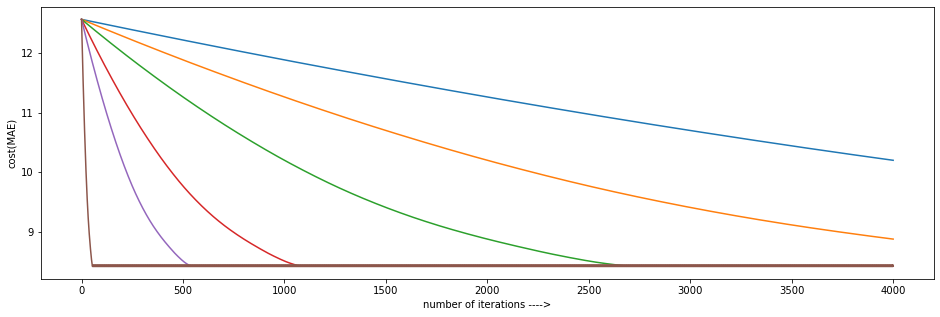

In [69]:
alpha_lst=[0.0005,0.001,0.002,0.005,0.01,0.1]
alpha_lst2=[0.001]
num_iter=4000
for alpha in alpha_lst: 
    theta,bias,cost=multi_var_linear_regression_mae(train_values,train_labels,alpha,num_iter)
    #print("theta :",theta)
    #print("bias ",bias)
    n_iter=[x for x in range(num_iter)]
    plt.plot(n_iter,cost)
    plt.xlabel('number of iterations ---->')
    plt.ylabel('cost(MAE)')
    prediction=[]
    for i in range(len(test_values)):
        prediction.append(predict(test_values[i],theta,bias))
        #print(prediction[i],test_values[i])
    print("For alpha : ",alpha)
    print("R squared score is :",r2_score(np.array(test_labels),np.array(prediction)))
    print("mean square error is : ",mean_squared_error(np.array(test_labels),np.array(prediction)))
    print("mean absolute error is : ",mean_absolute_error(np.array(test_labels),np.array(prediction)))
    print('|-----------------------------------------------------------------------------------------------------|')

# When cost function is mean squared error

For alpha :  0.0005
R squared score is : 0.7155080267241241
mean square error is :  32.384891301326434
mean absolute error is :  4.710048095657252
|-----------------------------------------------------------------------------------------------------|
For alpha :  0.001
R squared score is : 0.7931875836181209
mean square error is :  23.542307880149078
mean absolute error is :  4.005258519165775
|-----------------------------------------------------------------------------------------------------|
For alpha :  0.002
R squared score is : 0.888423324294541
mean square error is :  12.701231858589816
mean absolute error is :  2.9916894803838203
|-----------------------------------------------------------------------------------------------------|
For alpha :  0.005
R squared score is : 0.9116686957646393
mean square error is :  10.055115626733643
mean absolute error is :  2.7722379903103738
|-----------------------------------------------------------------------------------------------------

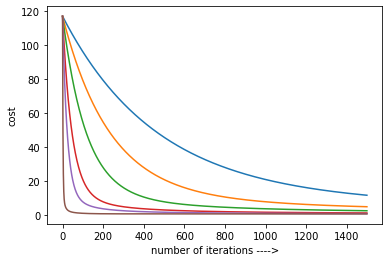

In [37]:
alpha_lst=[0.0005,0.001,0.002,0.005,0.01,0.1]
alpha_lst2=[0.001]
num_iter=1500
for alpha in alpha_lst: 
    theta,bias,cost=multi_var_linear_regression(train_values,train_labels,alpha,num_iter)
    #print("theta :",theta)
    #print("bias ",bias)
    n_iter=[x for x in range(num_iter)]
    plt.plot(n_iter,cost)
    plt.xlabel('number of iterations ---->')
    plt.ylabel('cost(MSE)')
    prediction=[]
    for i in range(len(test_values)):
        prediction.append(predict(test_values[i],theta,bias))
        #print(prediction[i],test_values[i])
    print("For alpha : ",alpha)
    print("R squared score is :",r2_score(np.array(test_labels),np.array(prediction)))
    print("mean square error is : ",mean_squared_error(np.array(test_labels),np.array(prediction)))
    print("mean absolute error is : ",mean_absolute_error(np.array(test_labels),np.array(prediction)))
    print('|-----------------------------------------------------------------------------------------------------|')

# For different values of coefficients(sign,range)

random_weights : 
[ 82.97443125 111.75330809  89.6135614  100.5457345  108.31943028
 106.93407552 103.85287092 116.43676958  93.30930324 117.72994705
 109.67727135  87.98647491  82.81479023  88.44242616  97.91395586
  81.40131891 109.59872734  90.32833347 102.0191256   88.24506714
 107.33226682 107.54498489 111.43872104 113.72004055 110.97959895
 101.99367731  90.50936469 114.24451105 111.72845025  99.96685071
  86.60745705 106.94603262  90.36195352 111.5259874   82.21455278]
For alpha :  0.0005
R squared score is : -14.388588837449204
mean square error is :  1751.746353484402
mean absolute error is :  36.259365869750084
|-----------------------------------------------------------------------------------------------------|
random_weights : 
[215.52467578 201.96161413 215.43535712 201.55302644 194.77685277
 210.64184269 181.75980724 211.19175481 180.42863132 187.9254435
 181.19040985 204.41740295 185.25431644 216.44863927 181.36189618
 208.53852736 187.29262055 180.36823527 211.68373999

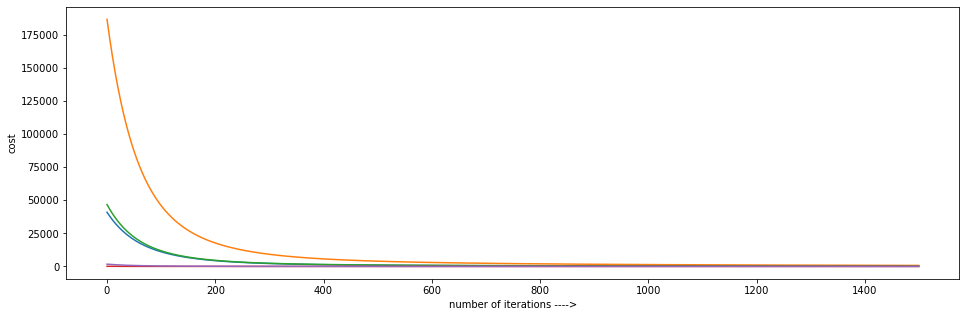

In [51]:
alpha_lst=[0.0005,0.001,0.002,0.005,0.01,0.1]
num_iter=1500
for i in range(5): 
    theta,bias,cost=multi_var_linear_regression_random(train_values,train_labels,0.005,num_iter,i)
    #print("theta :",theta)
    #print("bias ",bias)
    n_iter=[x for x in range(num_iter)]
    plt.rcParams["figure.figsize"] = (16,5)
    plt.plot(n_iter,cost)
    plt.xlabel('number of iterations ---->')
    plt.ylabel('cost')
    prediction=[]
    for i in range(len(test_values)):
        prediction.append(predict(test_values[i],theta,bias))
        #print(prediction[i],test_values[i])
    print("For alpha : ",alpha)
    print("R squared score is :",r2_score(np.array(test_labels),np.array(prediction)))
    print("mean square error is : ",mean_squared_error(np.array(test_labels),np.array(prediction)))
    print("mean absolute error is : ",mean_absolute_error(np.array(test_labels),np.array(prediction)))
    print('|-----------------------------------------------------------------------------------------------------|')

we see that for fixed learning rate and different values,signs and range of weights the cost increases and decreses rapidly.However it converges but it starts at a very very high cost than normal initialization like np.zeros or np.random.